In [13]:
import pandas as pd
import numpy as np

#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

display(data.head(3))
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))
print(np.unique(data[len(data.columns)-1]))
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)
data.groupby(['arrhythmia']).size()
data = data._get_numeric_data()
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))
data.head(3)
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label
print(np.unique(y))
print(X.shape)
# splitting the dataset to training and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)
# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


452 rows and 280 columns
[ 1  2  3  4  5  6  7  8  9 10 14 15 16]
452 rows and 275 columns
[0 1]
(452, 274)


In [70]:
from sklearn.metrics import precision_score, recall_score
from lib import *
class LogisticRegression(object):

    def __init__(self, eta=0.05, n_epoch=1, random_state=1):
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += (self.eta * X.T.dot(errors))
            self.w_[0] += self.eta * errors.sum()
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate loss"""
        # TODO
        errors = (y - output)
        return (errors**2).sum()/2.0
    
    def activation(self, z):
        #TODO
        return 1/(1+np.exp(-z))
    def predict(self, X):
        """Return class label after unit step"""
        # TODO
        y =self.activation(self.net_input(X))
        return (np.round(y)).astype(int)
        

In [116]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion(y_true,y_pred,name = 'asdf'):
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(4,4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.text(0.5, 1.18, name,
             horizontalalignment='center',
             fontsize=20,
            transform = ax.transAxes)
    plt.tight_layout()

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    plt.show()



In [150]:
def my_f1_score(y_true, y_pred):
    TP=0
    TN=0
    FP=0
    FN=0
    for i in range(len(y_true)):
        #increment TN[other] with 1
        if y_pred[i] ==  y_true[i]:
            if y_true[i] == 1:
                TP+=1
            else:
                TN+=1
        else:
            if y_true[i] == 1:
                FP+= 1
            else:
                FN += 1

    PRE = round((TP)/(TP+FP),3)
    REC = round((TP)/(TP+FN),3)
    return 2*PRE*REC/(PRE+REC)

(array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1]), array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0]))
train f1: 0.8644404624277456


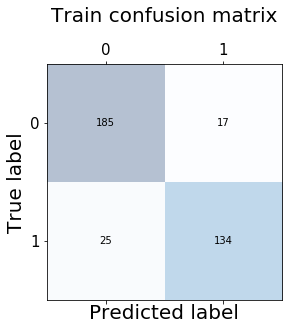

test f1: 0.7628865979381444


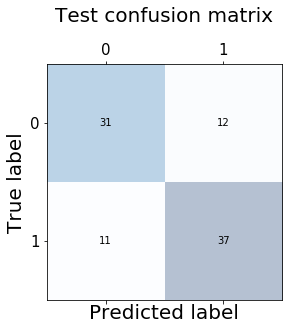

In [151]:
# 0.75>  don't use sklearn
from sklearn.metrics import precision_score, recall_score, f1_score
model = LogisticRegression( eta=0.05,n_epoch = 20)
model.fit(X_train_std,y_train)

print((y_test.values.astype(int),y_pred[:10]))

y_pred = model.predict(X_train_std)
print('train f1:', my_f1_score(y_train.values.astype(int),y_pred))
plot_confusion(y_train.values, y_pred,'Train confusion matrix')


y_pred = model.predict(X_test_std)
print('test f1:', f1_score(y_test.values,y_pred))
plot_confusion(y_test.values, y_pred,'Test confusion matrix')
